In [20]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stat
from sklearn.cluster import AgglomerativeClustering
from sklearn.svm import SVC
from sklearn.decomposition import PCA
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [191]:
veh_df = pd.read_csv("vehicle.csv")
veh_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 846 entries, 0 to 845
Data columns (total 19 columns):
compactness                    846 non-null int64
circularity                    841 non-null float64
distance_circularity           842 non-null float64
radius_ratio                   840 non-null float64
pr.axis_aspect_ratio           844 non-null float64
max.length_aspect_ratio        846 non-null int64
scatter_ratio                  845 non-null float64
elongatedness                  845 non-null float64
pr.axis_rectangularity         843 non-null float64
max.length_rectangularity      846 non-null int64
scaled_variance                843 non-null float64
scaled_variance.1              844 non-null float64
scaled_radius_of_gyration      844 non-null float64
scaled_radius_of_gyration.1    842 non-null float64
skewness_about                 840 non-null float64
skewness_about.1               845 non-null float64
skewness_about.2               845 non-null float64
hollows_ratio    

In [192]:
for index, row in veh_df.iterrows():
    veh_df.at[index, "index_"] = index
veh_df.head()

,compactness,circularity,distance_circularity,radius_ratio,pr.axis_aspect_ratio,max.length_aspect_ratio,scatter_ratio,elongatedness,pr.axis_rectangularity,max.length_rectangularity,scaled_variance,scaled_variance.1,scaled_radius_of_gyration,scaled_radius_of_gyration.1,skewness_about,skewness_about.1,skewness_about.2,hollows_ratio,class,index_
0,95,48.0,83.0,178.0,72.0,10,162.0,42.0,20.0,159,176.0,379.0,184.0,70.0,6.0,16.0,187.0,197,van,0.0
1,91,41.0,84.0,141.0,57.0,9,149.0,45.0,19.0,143,170.0,330.0,158.0,72.0,9.0,14.0,189.0,199,van,1.0
2,104,50.0,106.0,209.0,66.0,10,207.0,32.0,23.0,158,223.0,635.0,220.0,73.0,14.0,9.0,188.0,196,car,2.0
3,93,41.0,82.0,159.0,63.0,9,144.0,46.0,19.0,143,160.0,309.0,127.0,63.0,6.0,10.0,199.0,207,van,3.0
4,85,44.0,70.0,205.0,103.0,52,149.0,45.0,19.0,144,241.0,325.0,188.0,127.0,9.0,11.0,180.0,183,bus,4.0


In [193]:
veh_impute_df = veh_df[(veh_df["compactness"].isnull() == False) &
                      (veh_df["circularity"].isnull() == False) &
                      (veh_df["distance_circularity"].isnull() == False) &
                      (veh_df["radius_ratio"].isnull() == False) &
                      (veh_df["pr.axis_aspect_ratio"].isnull() == False) &
                      (veh_df["max.length_aspect_ratio"].isnull() == False) &
                      (veh_df["scatter_ratio"].isnull() == False) &
                      (veh_df["elongatedness"].isnull() == False) &
                      (veh_df["pr.axis_rectangularity"].isnull() == False) &
                      (veh_df["max.length_rectangularity"].isnull() == False) &
                      (veh_df["scaled_variance"].isnull() == False) &
                      (veh_df["scaled_variance.1"].isnull() == False) &
                      (veh_df["scaled_radius_of_gyration"].isnull() == False) &
                      (veh_df["scaled_radius_of_gyration.1"].isnull() == False) &
                      (veh_df["skewness_about"].isnull() == False) &
                      (veh_df["skewness_about.1"].isnull() == False) &
                      (veh_df["skewness_about.2"].isnull() == False) &
                      (veh_df["hollows_ratio"].isnull() == False)]

In [194]:
y = veh_impute_df["circularity"]
x = veh_impute_df[["compactness", "max.length_aspect_ratio", "max.length_rectangularity","hollows_ratio"]]
#x = veh_impute_df.drop(["circularity", "class"], axis = 1)
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.4, random_state = 100)
lin_reg = LinearRegression()
lin_reg.fit(x_train, y_train)
print(lin_reg.score(x_train, y_train))
print(lin_reg.score(x_test, y_test))
impute_x = veh_df[veh_df["circularity"].isnull()]
indice_x = np.array(impute_x["index_"])
impute_x = impute_x[["compactness", "max.length_aspect_ratio", "max.length_rectangularity","hollows_ratio"]]
#impute_x = impute_x.drop(["circularity", "class","distance_circularity",], axis = 1)
pred = lin_reg.predict(impute_x)
print(pred)
i = 0
for prediction in pred:
    indice = indice_x[i]
    veh_df.at[indice, "circularity"] = prediction
    i = i + 1

0.9433696905292912
0.9329775133366993
[54.65485222 53.45311984 43.27689753 42.28047724 55.23685784]


In [195]:
y = veh_impute_df["scaled_radius_of_gyration"]
x = veh_impute_df[["compactness", "max.length_aspect_ratio", "max.length_rectangularity","hollows_ratio","circularity"]]
#x = veh_impute_df.drop(["circularity", "class"], axis = 1)
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 100)
lin_reg = LinearRegression()
lin_reg.fit(x_train, y_train)
print(lin_reg.score(x_train, y_train))
print(lin_reg.score(x_test, y_test))
impute_x = veh_df[veh_df["scaled_radius_of_gyration"].isnull()]
indice_x = np.array(impute_x["index_"])
impute_x = impute_x[["compactness", "max.length_aspect_ratio", "max.length_rectangularity","hollows_ratio","circularity"]]
#impute_x = impute_x.drop(["circularity", "class","distance_circularity",], axis = 1)
pred = lin_reg.predict(impute_x)
print(pred)
i = 0
for prediction in pred:
    indice = indice_x[i]
    veh_df.at[indice, "scaled_radius_of_gyration"] = prediction
    i = i + 1

0.9178517990771242
0.9021737185317006
[162.10175344 169.56436937]


In [196]:
y = veh_impute_df["scaled_variance.1"]
x = veh_impute_df[["compactness", "max.length_aspect_ratio", "max.length_rectangularity","hollows_ratio","circularity","scaled_radius_of_gyration"]]
#x = veh_impute_df.drop(["circularity", "class"], axis = 1)
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 100)
lin_reg = LinearRegression()
lin_reg.fit(x_train, y_train)
print(lin_reg.score(x_train, y_train))
print(lin_reg.score(x_test, y_test))
impute_x = veh_df[veh_df["scaled_variance.1"].isnull()]
indice_x = np.array(impute_x["index_"])
impute_x = impute_x[["compactness", "max.length_aspect_ratio", "max.length_rectangularity","hollows_ratio","circularity","scaled_radius_of_gyration"]]
#impute_x = impute_x.drop(["circularity", "class","distance_circularity",], axis = 1)
pred = lin_reg.predict(impute_x)
print(pred)
i = 0
for prediction in pred:
    indice = indice_x[i]
    veh_df.at[indice, "scaled_variance.1"] = prediction
    i = i + 1

0.8438464019372233
0.8437560299505276
[682.99928383 712.95871914]


In [197]:
y = veh_impute_df["pr.axis_rectangularity"]
x = veh_impute_df[["compactness", "max.length_aspect_ratio", "max.length_rectangularity","hollows_ratio","circularity","scaled_radius_of_gyration","scaled_variance.1"]]
#x = veh_impute_df.drop(["circularity", "class"], axis = 1)
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 100)
lin_reg = LinearRegression()
lin_reg.fit(x_train, y_train)
print(lin_reg.score(x_train, y_train))
print(lin_reg.score(x_test, y_test))
impute_x = veh_df[veh_df["pr.axis_rectangularity"].isnull()]
indice_x = np.array(impute_x["index_"])
impute_x = impute_x[["compactness", "max.length_aspect_ratio", "max.length_rectangularity","hollows_ratio","circularity","scaled_radius_of_gyration","scaled_variance.1"]]
#impute_x = impute_x.drop(["circularity", "class","distance_circularity",], axis = 1)
pred = lin_reg.predict(impute_x)
print(pred)
i = 0
for prediction in pred:
    indice = indice_x[i]
    veh_df.at[indice, "pr.axis_rectangularity"] = prediction
    i = i + 1

0.986561293043548
0.9855590926899332
[24.26106337 18.98274889 18.7271121 ]


In [198]:
y = veh_impute_df["scatter_ratio"]
x = veh_impute_df[["compactness", "max.length_aspect_ratio", "max.length_rectangularity","hollows_ratio","circularity","scaled_radius_of_gyration","scaled_variance.1","pr.axis_rectangularity"]]
#x = veh_impute_df.drop(["circularity", "class"], axis = 1)
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 100)
lin_reg = LinearRegression()
lin_reg.fit(x_train, y_train)
print(lin_reg.score(x_train, y_train))
print(lin_reg.score(x_test, y_test))
impute_x = veh_df[veh_df["scatter_ratio"].isnull()]
indice_x = np.array(impute_x["index_"])
impute_x = impute_x[["compactness", "max.length_aspect_ratio", "max.length_rectangularity","hollows_ratio","circularity","scaled_radius_of_gyration","scaled_variance.1","pr.axis_rectangularity"]]
#impute_x = impute_x.drop(["circularity", "class","distance_circularity",], axis = 1)
pred = lin_reg.predict(impute_x)
print(pred)
i = 0
for prediction in pred:
    indice = indice_x[i]
    veh_df.at[indice, "scatter_ratio"] = prediction
    i = i + 1

0.9943769548332877
0.9946308046599123
[121.76444372]


In [199]:
y = veh_impute_df["skewness_about.2"]
x = veh_impute_df[["compactness", "max.length_aspect_ratio", "max.length_rectangularity","hollows_ratio","circularity","scaled_radius_of_gyration","scaled_variance.1","pr.axis_rectangularity","scatter_ratio"]]
#x = veh_impute_df.drop(["circularity", "class"], axis = 1)
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 100)
lin_reg = LinearRegression()
lin_reg.fit(x_train, y_train)
print(lin_reg.score(x_train, y_train))
print(lin_reg.score(x_test, y_test))
impute_x = veh_df[veh_df["skewness_about.2"].isnull()]
indice_x = np.array(impute_x["index_"])
impute_x = impute_x[["compactness", "max.length_aspect_ratio", "max.length_rectangularity","hollows_ratio","circularity","scaled_radius_of_gyration","scaled_variance.1","pr.axis_rectangularity","scatter_ratio"]]
#impute_x = impute_x.drop(["circularity", "class","distance_circularity",], axis = 1)
pred = lin_reg.predict(impute_x)
print(pred)
i = 0
for prediction in pred:
    indice = indice_x[i]
    veh_df.at[indice, "skewness_about.2"] = prediction
    i = i + 1

0.885101932745877
0.8479913879567993
[199.17956886]


In [200]:
y = veh_impute_df["elongatedness"]
x = veh_impute_df[["compactness", "max.length_aspect_ratio", "max.length_rectangularity","hollows_ratio","circularity","scaled_radius_of_gyration","scaled_variance.1","pr.axis_rectangularity","scatter_ratio","skewness_about.2"]]
#x = veh_impute_df.drop(["circularity", "class"], axis = 1)
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 100)
lin_reg = LinearRegression()
lin_reg.fit(x_train, y_train)
print(lin_reg.score(x_train, y_train))
print(lin_reg.score(x_test, y_test))
impute_x = veh_df[veh_df["elongatedness"].isnull()]
indice_x = np.array(impute_x["index_"])
impute_x = impute_x[["compactness", "max.length_aspect_ratio", "max.length_rectangularity","hollows_ratio","circularity","scaled_radius_of_gyration","scaled_variance.1","pr.axis_rectangularity","scatter_ratio","skewness_about.2"]]
#impute_x = impute_x.drop(["circularity", "class","distance_circularity",], axis = 1)
pred = lin_reg.predict(impute_x)
print(pred)
i = 0
for prediction in pred:
    indice = indice_x[i]
    veh_df.at[indice, "elongatedness"] = prediction
    i = i + 1

0.9907563990500493
0.9889082466823618
[41.42025525]


In [201]:
y = veh_impute_df["scaled_variance"]
x = veh_impute_df[["compactness", "max.length_aspect_ratio", "max.length_rectangularity","hollows_ratio","circularity","scaled_radius_of_gyration","scaled_variance.1","pr.axis_rectangularity","scatter_ratio","skewness_about.2","elongatedness"]]
#x = veh_impute_df.drop(["circularity", "class"], axis = 1)
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 100)
lin_reg = LinearRegression()
lin_reg.fit(x_train, y_train)
print(lin_reg.score(x_train, y_train))
print(lin_reg.score(x_test, y_test))
impute_x = veh_df[veh_df["scaled_variance"].isnull()]
indice_x = np.array(impute_x["index_"])
impute_x = impute_x[["compactness", "max.length_aspect_ratio", "max.length_rectangularity","hollows_ratio","circularity","scaled_radius_of_gyration","scaled_variance.1","pr.axis_rectangularity","scatter_ratio","skewness_about.2","elongatedness"]]
#impute_x = impute_x.drop(["circularity", "class","distance_circularity",], axis = 1)
pred = lin_reg.predict(impute_x)
print(pred)
i = 0
for prediction in pred:
    indice = indice_x[i]
    veh_df.at[indice, "scaled_variance"] = prediction
    i = i + 1

0.9660933645391772
0.9554419784422672
[229.46569832 171.38603384 155.10054811]


In [202]:
y = veh_impute_df["distance_circularity"]
x = veh_impute_df[["compactness", "max.length_aspect_ratio", "max.length_rectangularity","hollows_ratio","circularity","scaled_radius_of_gyration","scaled_variance.1","pr.axis_rectangularity","scatter_ratio","skewness_about.2","elongatedness","scaled_variance"]]
#x = veh_impute_df.drop(["circularity", "class"], axis = 1)
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 100)
lin_reg = LinearRegression()
lin_reg.fit(x_train, y_train)
print(lin_reg.score(x_train, y_train))
print(lin_reg.score(x_test, y_test))
impute_x = veh_df[veh_df["distance_circularity"].isnull()]
indice_x = np.array(impute_x["index_"])
impute_x = impute_x[["compactness", "max.length_aspect_ratio", "max.length_rectangularity","hollows_ratio","circularity","scaled_radius_of_gyration","scaled_variance.1","pr.axis_rectangularity","scatter_ratio","skewness_about.2","elongatedness","scaled_variance"]]
#impute_x = impute_x.drop(["circularity", "class","distance_circularity",], axis = 1)
pred = lin_reg.predict(impute_x)
print(pred)
i = 0
for prediction in pred:
    indice = indice_x[i]
    veh_df.at[indice, "distance_circularity"] = prediction
    i = i + 1

0.9132001361606964
0.8909844780441166
[82.46245715 70.93909968 67.7255055  92.82417569]


In [203]:
y = veh_impute_df["radius_ratio"]
x = veh_impute_df[["compactness", "max.length_aspect_ratio", "max.length_rectangularity","hollows_ratio","circularity","scaled_radius_of_gyration","scaled_variance.1","pr.axis_rectangularity","scatter_ratio","skewness_about.2","elongatedness","scaled_variance","distance_circularity"]]
#x = veh_impute_df.drop(["circularity", "class"], axis = 1)
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 100)
lin_reg = LinearRegression()
lin_reg.fit(x_train, y_train)
print(lin_reg.score(x_train, y_train))
print(lin_reg.score(x_test, y_test))
impute_x = veh_df[veh_df["radius_ratio"].isnull()]
indice_x = np.array(impute_x["index_"])
impute_x = impute_x[["compactness", "max.length_aspect_ratio", "max.length_rectangularity","hollows_ratio","circularity","scaled_radius_of_gyration","scaled_variance.1","pr.axis_rectangularity","scatter_ratio","skewness_about.2","elongatedness","scaled_variance","distance_circularity"]]
#impute_x = impute_x.drop(["circularity", "class","distance_circularity",], axis = 1)
pred = lin_reg.predict(impute_x)
print(pred)
i = 0
for prediction in pred:
    indice = indice_x[i]
    veh_df.at[indice, "radius_ratio"] = prediction
    i = i + 1

0.8645118081525839
0.8104992055726639
[200.09900907 196.00445731 160.74980711 154.0075629  200.61675479
 183.88994023]


In [204]:
y = veh_impute_df["scaled_radius_of_gyration.1"]
x = veh_impute_df[["compactness", "max.length_aspect_ratio", "max.length_rectangularity","hollows_ratio","circularity","scaled_radius_of_gyration","scaled_variance.1","pr.axis_rectangularity","scatter_ratio","skewness_about.2","elongatedness","scaled_variance","distance_circularity","radius_ratio"]]
#x = veh_impute_df.drop(["circularity", "class"], axis = 1)
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 100)
lin_reg = LinearRegression()
lin_reg.fit(x_train, y_train)
print(lin_reg.score(x_train, y_train))
print(lin_reg.score(x_test, y_test))
impute_x = veh_df[veh_df["scaled_radius_of_gyration.1"].isnull()]
indice_x = np.array(impute_x["index_"])
impute_x = impute_x[["compactness", "max.length_aspect_ratio", "max.length_rectangularity","hollows_ratio","circularity","scaled_radius_of_gyration","scaled_variance.1","pr.axis_rectangularity","scatter_ratio","skewness_about.2","elongatedness","scaled_variance","distance_circularity","radius_ratio"]]
#impute_x = impute_x.drop(["circularity", "class","distance_circularity",], axis = 1)
pred = lin_reg.predict(impute_x)
print(pred)
i = 0
for prediction in pred:
    indice = indice_x[i]
    veh_df.at[indice, "scaled_radius_of_gyration.1"] = prediction
    i = i + 1

0.9016952594369838
0.8129503743386912
[82.21652784 81.30817742 71.98814194 70.3223477 ]


In [205]:
y = veh_impute_df["pr.axis_aspect_ratio"]
x = veh_impute_df[["compactness", "max.length_aspect_ratio", "max.length_rectangularity","hollows_ratio","circularity","scaled_radius_of_gyration","scaled_variance.1","pr.axis_rectangularity","scatter_ratio","skewness_about.2","elongatedness","scaled_variance","distance_circularity","radius_ratio","scaled_radius_of_gyration.1"]]
#x = veh_impute_df.drop(["circularity", "class"], axis = 1)
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 100)
lin_reg = LinearRegression()
lin_reg.fit(x_train, y_train)
print(lin_reg.score(x_train, y_train))
print(lin_reg.score(x_test, y_test))
impute_x = veh_df[veh_df["pr.axis_aspect_ratio"].isnull()]
indice_x = np.array(impute_x["index_"])
impute_x = impute_x[["compactness", "max.length_aspect_ratio", "max.length_rectangularity","hollows_ratio","circularity","scaled_radius_of_gyration","scaled_variance.1","pr.axis_rectangularity","scatter_ratio","skewness_about.2","elongatedness","scaled_variance","distance_circularity","radius_ratio","scaled_radius_of_gyration.1"]]
#impute_x = impute_x.drop(["circularity", "class","distance_circularity",], axis = 1)
pred = lin_reg.predict(impute_x)
print(pred)
i = 0
for prediction in pred:
    indice = indice_x[i]
    veh_df.at[indice, "pr.axis_aspect_ratio"] = prediction
    i = i + 1

0.9384902047996015
0.9460557828066145
[69.25494215 69.007041  ]


"skewness_about.1" and "skewness_about" cannot be predicted by the other variables

In [207]:
veh_df_upd = veh_df[(veh_df["compactness"].isnull() == False) &
                      (veh_df["circularity"].isnull() == False) &
                      (veh_df["distance_circularity"].isnull() == False) &
                      (veh_df["radius_ratio"].isnull() == False) &
                      (veh_df["pr.axis_aspect_ratio"].isnull() == False) &
                      (veh_df["max.length_aspect_ratio"].isnull() == False) &
                      (veh_df["scatter_ratio"].isnull() == False) &
                      (veh_df["elongatedness"].isnull() == False) &
                      (veh_df["pr.axis_rectangularity"].isnull() == False) &
                      (veh_df["max.length_rectangularity"].isnull() == False) &
                      (veh_df["scaled_variance"].isnull() == False) &
                      (veh_df["scaled_variance.1"].isnull() == False) &
                      (veh_df["scaled_radius_of_gyration"].isnull() == False) &
                      (veh_df["scaled_radius_of_gyration.1"].isnull() == False) &
                      (veh_df["skewness_about"].isnull() == False) &
                      (veh_df["skewness_about.1"].isnull() == False) &
                      (veh_df["skewness_about.2"].isnull() == False) &
                      (veh_df["hollows_ratio"].isnull() == False)]

In [212]:
veh_df_upd = veh_df_upd.drop("index_", axis = 1)
veh_df_upd.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 839 entries, 0 to 845
Data columns (total 19 columns):
compactness                    839 non-null int64
circularity                    839 non-null float64
distance_circularity           839 non-null float64
radius_ratio                   839 non-null float64
pr.axis_aspect_ratio           839 non-null float64
max.length_aspect_ratio        839 non-null int64
scatter_ratio                  839 non-null float64
elongatedness                  839 non-null float64
pr.axis_rectangularity         839 non-null float64
max.length_rectangularity      839 non-null int64
scaled_variance                839 non-null float64
scaled_variance.1              839 non-null float64
scaled_radius_of_gyration      839 non-null float64
scaled_radius_of_gyration.1    839 non-null float64
skewness_about                 839 non-null float64
skewness_about.1               839 non-null float64
skewness_about.2               839 non-null float64
hollows_ratio    

In [210]:
print("compactness", np.percentile(veh_df_upd["compactness"],[0,25,50,75,100]))
print("circularity", np.percentile(veh_df_upd["circularity"],[0,25,50,75,100]))
print("distance_circularity", np.percentile(veh_df_upd["distance_circularity"],[0,25,50,75,100]))
print("radius_ratio", np.percentile(veh_df_upd["radius_ratio"],[0,25,50,75,100]))
print("pr.axis_aspect_ratio", np.percentile(veh_df_upd["pr.axis_aspect_ratio"],[0,25,50,75,100]))
print("max.length_aspect_ratio", np.percentile(veh_df_upd["max.length_aspect_ratio"],[0,25,50,75,100]))
print("scatter_ratio", np.percentile(veh_df_upd["scatter_ratio"],[0,25,50,75,100]))
print("elongatedness", np.percentile(veh_df_upd["elongatedness"],[0,25,50,75,100]))
print("pr.axis_rectangularity", np.percentile(veh_df_upd["pr.axis_rectangularity"],[0,25,50,75,100]))
print("max.length_rectangularity", np.percentile(veh_df_upd["max.length_rectangularity"],[0,25,50,75,100]))
print("scaled_variance", np.percentile(veh_df_upd["scaled_variance"],[0,25,50,75,100]))
print("scaled_variance.1", np.percentile(veh_df_upd["scaled_variance.1"],[0,25,50,75,100]))
print("scaled_radius_of_gyration", np.percentile(veh_df_upd["scaled_radius_of_gyration"],[0,25,50,75,100]))
print("scaled_radius_of_gyration.1", np.percentile(veh_df_upd["scaled_radius_of_gyration.1"],[0,25,50,75,100]))
print("skewness_about.1", np.percentile(veh_df_upd["skewness_about.1"],[0,25,50,75,100]))
print("skewness_about.2", np.percentile(veh_df_upd["skewness_about.2"],[0,25,50,75,100]))
print("hollows_ratio", np.percentile(veh_df_upd["hollows_ratio"],[0,25,50,75,100]))

compactness [ 73.  87.  93. 100. 119.]
circularity [33. 40. 44. 49. 59.]
distance_circularity [ 40.  70.  80.  98. 112.]
radius_ratio [104. 141. 167. 195. 333.]
pr.axis_aspect_ratio [ 47.  57.  61.  65. 138.]
max.length_aspect_ratio [ 2.  7.  8. 10. 55.]
scatter_ratio [112.  146.5 157.  198.  265. ]
elongatedness [26. 33. 43. 46. 61.]
pr.axis_rectangularity [17. 19. 20. 23. 29.]
max.length_rectangularity [118.  137.  146.  159.5 188. ]
scaled_variance [130. 167. 179. 217. 320.]
scaled_variance.1 [ 184.   318.5  364.   592.  1018. ]
scaled_radius_of_gyration [109. 149. 173. 198. 268.]
scaled_radius_of_gyration.1 [ 59.          67.          71.98814194  75.         135.        ]
skewness_about.1 [ 0.  5. 11. 19. 41.]
skewness_about.2 [176. 184. 188. 193. 206.]
hollows_ratio [181. 191. 197. 201. 211.]


In [214]:
corr_mat = veh_df_upd.corr()

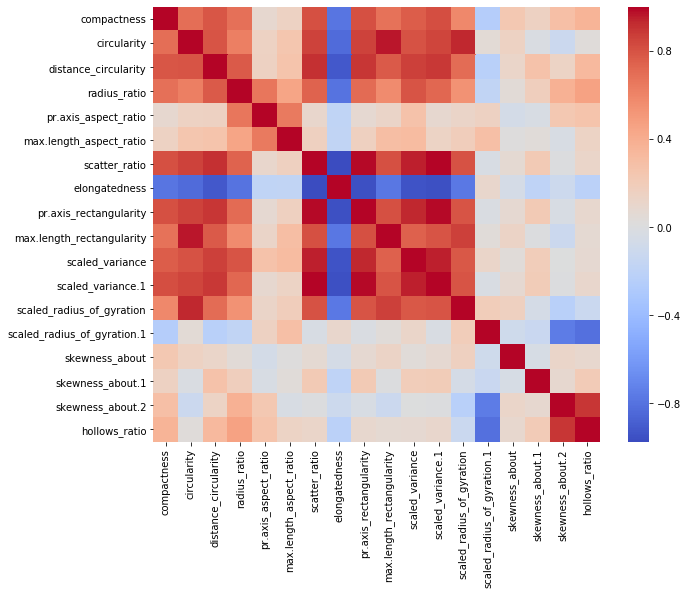

In [216]:
plt.figure(figsize = (10,8))
sns.heatmap(corr_mat, cmap = "coolwarm")

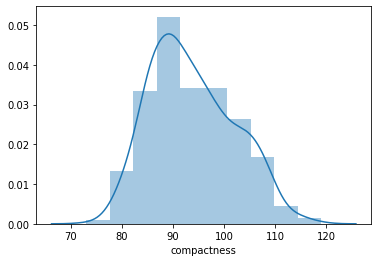

In [234]:
sns.distplot(veh_df_upd["compactness"],bins = 10)

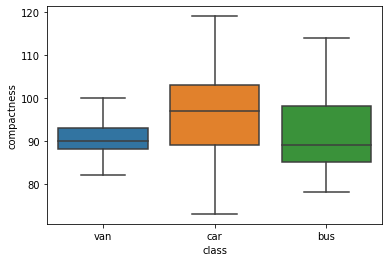

In [251]:
sns.boxplot(y = "compactness", x= "class", data = veh_df_upd)

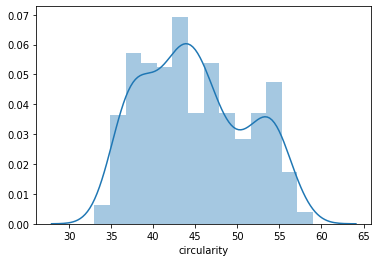

In [235]:
sns.distplot(veh_df_upd["circularity"])

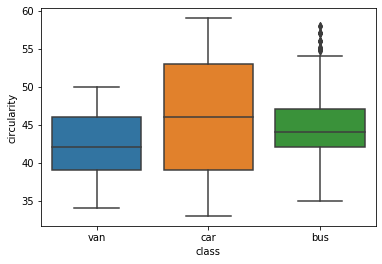

In [252]:
sns.boxplot(y = "circularity", x= "class", data = veh_df_upd)

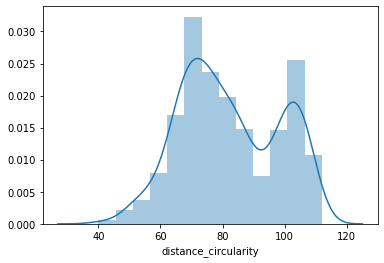

In [236]:
sns.distplot(veh_df_upd["distance_circularity"])

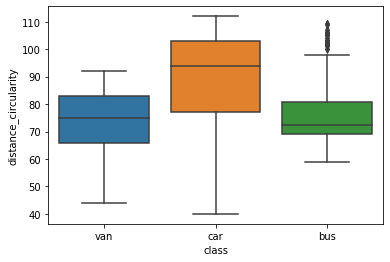

In [253]:
sns.boxplot(y = "distance_circularity", x= "class", data = veh_df_upd)

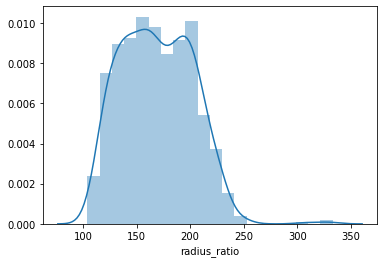

In [237]:
sns.distplot(veh_df_upd["radius_ratio"])

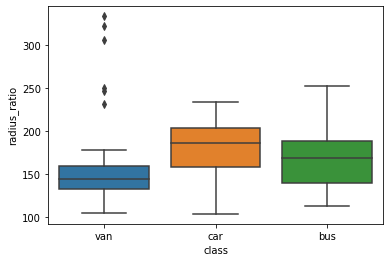

In [254]:
sns.boxplot(y = "radius_ratio", x= "class", data = veh_df_upd)

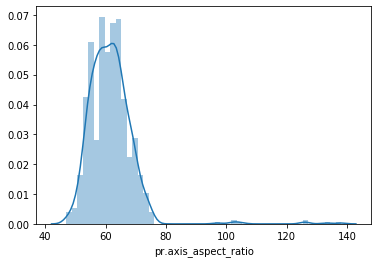

In [238]:
sns.distplot(veh_df_upd["pr.axis_aspect_ratio"])

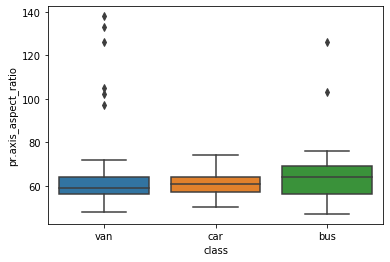

In [255]:
sns.boxplot(y = "pr.axis_aspect_ratio", x= "class", data = veh_df_upd)

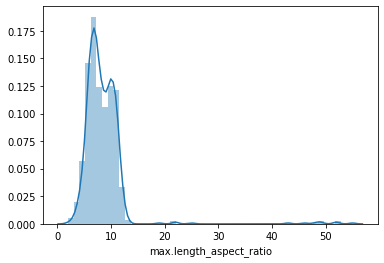

In [239]:
sns.distplot(veh_df_upd["max.length_aspect_ratio"])

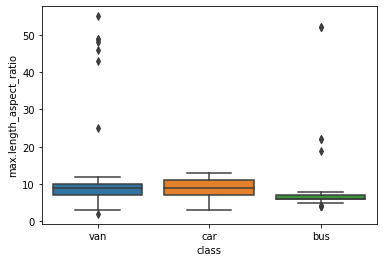

In [256]:
sns.boxplot(y = "max.length_aspect_ratio", x= "class", data = veh_df_upd)

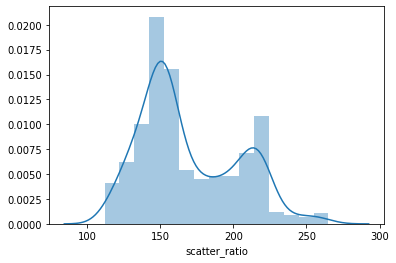

In [240]:
sns.distplot(veh_df_upd["scatter_ratio"])

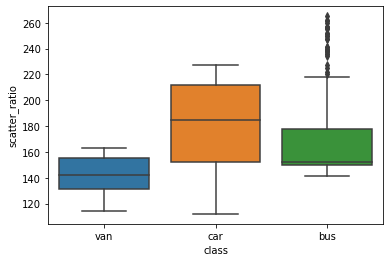

In [257]:
sns.boxplot(y = "scatter_ratio", x= "class", data = veh_df_upd)

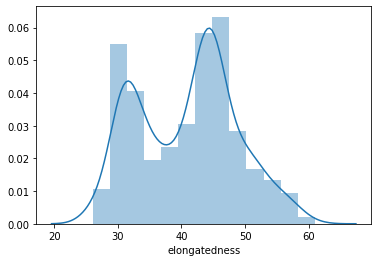

In [241]:
sns.distplot(veh_df_upd["elongatedness"])

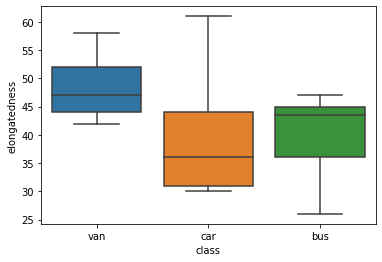

In [258]:
sns.boxplot(y = "elongatedness", x= "class", data = veh_df_upd)

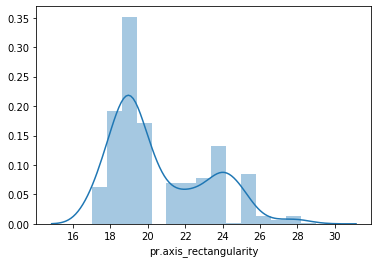

In [242]:
sns.distplot(veh_df_upd["pr.axis_rectangularity"])

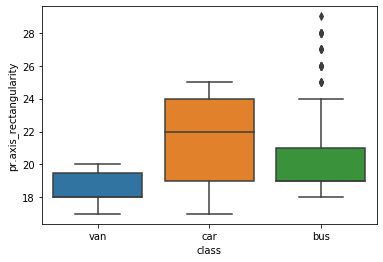

In [259]:
sns.boxplot(y = "pr.axis_rectangularity", x= "class", data = veh_df_upd)

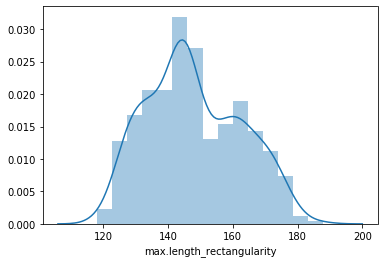

In [243]:
sns.distplot(veh_df_upd["max.length_rectangularity"])

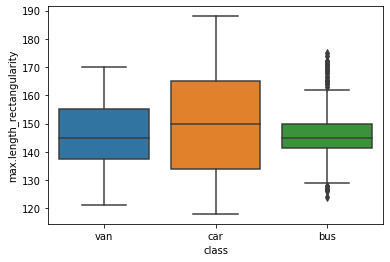

In [260]:
sns.boxplot(y = "max.length_rectangularity", x= "class", data = veh_df_upd)

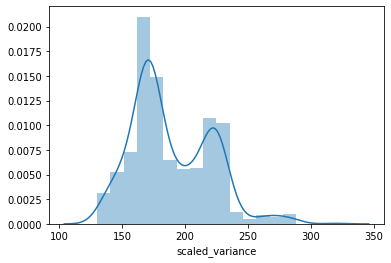

In [244]:
sns.distplot(veh_df_upd["scaled_variance"])

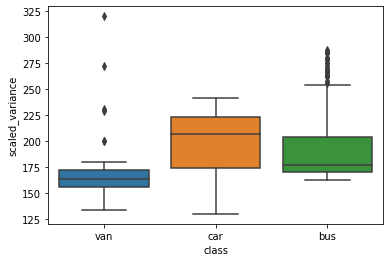

In [261]:
sns.boxplot(y = "scaled_variance", x= "class", data = veh_df_upd)

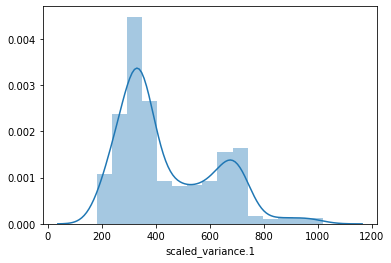

In [245]:
sns.distplot(veh_df_upd["scaled_variance.1"])

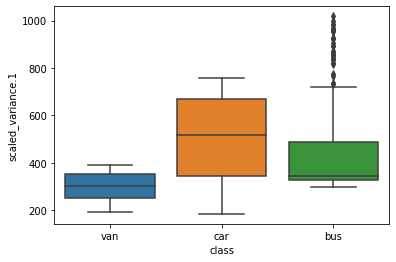

In [262]:
sns.boxplot(y = "scaled_variance.1", x= "class", data = veh_df_upd)

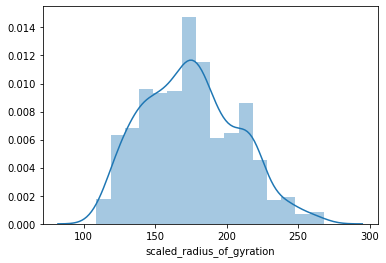

In [246]:
sns.distplot(veh_df_upd["scaled_radius_of_gyration"])

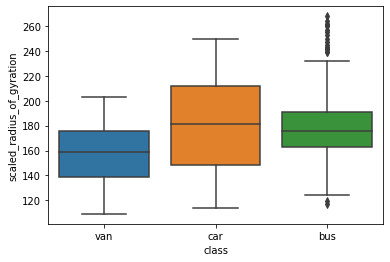

In [263]:
sns.boxplot(y = "scaled_radius_of_gyration", x= "class", data = veh_df_upd)

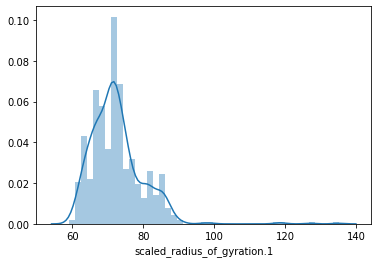

In [247]:
sns.distplot(veh_df_upd["scaled_radius_of_gyration.1"])

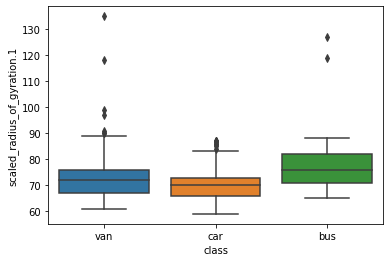

In [264]:
sns.boxplot(y = "scaled_radius_of_gyration.1", x= "class", data = veh_df_upd)

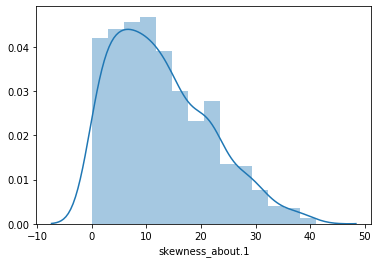

In [248]:
sns.distplot(veh_df_upd["skewness_about.1"])

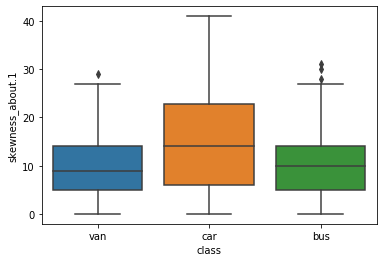

In [265]:
sns.boxplot(y = "skewness_about.1", x= "class", data = veh_df_upd)

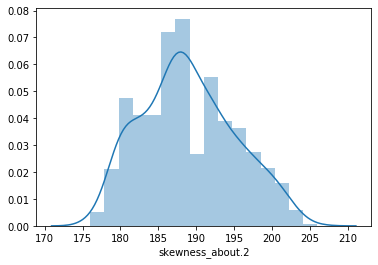

In [249]:
sns.distplot(veh_df_upd["skewness_about.2"])

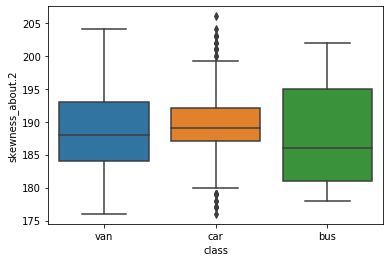

In [266]:
sns.boxplot(y = "skewness_about.2", x= "class", data = veh_df_upd)

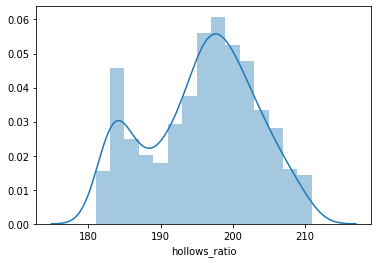

In [250]:
sns.distplot(veh_df_upd["hollows_ratio"])

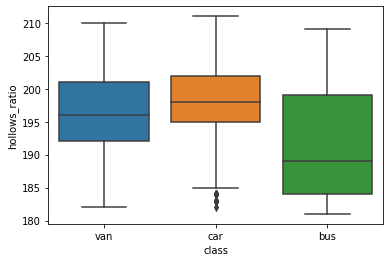

In [267]:
sns.boxplot(y = "hollows_ratio", x= "class", data = veh_df_upd)

In [275]:
veh_df_upd = veh_df_upd.replace({"class":{"car":1,"van":2,"bus":3}})

In [278]:
veh_df_upd["class"].nunique()

3

In [279]:
y = veh_df_upd["class"]
x = veh_df_upd.drop(["class"], axis = 1) 

In [280]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.25, random_state = 100)

In [289]:
svc_ = SVC(class_weight = "balanced")

In [290]:
svc_.fit(x_train, y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight='balanced', coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [291]:
y_pred = svc_.predict(x_test)

In [292]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           1       0.86      0.57      0.69       100
           2       0.55      0.79      0.65        58
           3       0.57      0.65      0.61        52

    accuracy                           0.65       210
   macro avg       0.66      0.67      0.65       210
weighted avg       0.70      0.65      0.66       210



In [293]:
pca = PCA(n_components=7)

In [294]:
pca.fit(x)

PCA(copy=True, iterated_power='auto', n_components=7, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

In [295]:
pca.explained_variance_ratio_

array([0.95925281, 0.01793506, 0.01197382, 0.00394869, 0.0019732 ,
       0.0013342 , 0.00114733])

In [299]:
pca = PCA(n_components=3)
pca.fit(x)
xpca = pca.transform(x)

[0.95925281 0.01793506 0.01197382]


<BarContainer object of 3 artists>

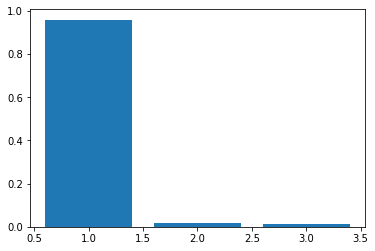

In [303]:
x_train, x_test, y_train, y_test = train_test_split(xpca, y, test_size = 0.25, random_state = 100)
print(pca.explained_variance_ratio_)
plt.bar(list(range(1,4)), pca.explained_variance_ratio_)

In [304]:
svc_ = SVC(class_weight="balanced")
svc_.fit(x_train, y_train)
y_pred = svc_.predict(x_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           1       0.86      0.61      0.71       100
           2       0.59      0.55      0.57        58
           3       0.48      0.79      0.60        52

    accuracy                           0.64       210
   macro avg       0.64      0.65      0.63       210
weighted avg       0.69      0.64      0.65       210

